<a href="https://colab.research.google.com/github/premkumar25/Trivago_click_rate_prediction/blob/main/Trivago_Click_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('train_set.csv')
df.head()

,hotel_id,city_id,content_score,n_images,distance_to_center,avg_rating,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,2.0,1199.0,77.0,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,3.0,12585.0,90.0,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,23491.0,83.0,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,8.0,3291.0,73.0,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,1.0,288.0,80.0,0.0,603.0,12.564,173.25,0.0,10


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396487 entries, 0 to 396486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hotel_id            396487 non-null  float64
 1   city_id             395979 non-null  float64
 2   content_score       395979 non-null  float64
 3   n_images            395978 non-null  float64
 4   distance_to_center  395958 non-null  float64
 5   avg_rating          286089 non-null  float64
 6   stars               395925 non-null  float64
 7   n_reviews           395958 non-null  float64
 8   avg_rank            396487 non-null  float64
 9   avg_price           396317 non-null  float64
 10  avg_saving_percent  396317 non-null  float64
 11  n_clicks            396487 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 36.3 MB


In [16]:
df1 = df.copy()

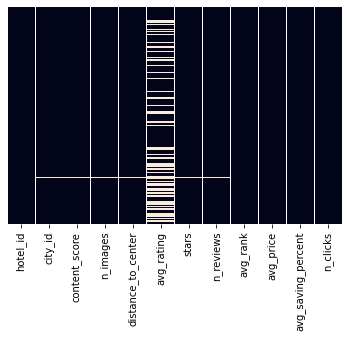

In [17]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [18]:
df1.isnull().sum()

hotel_id                   0
city_id                  508
content_score            508
n_images                 509
distance_to_center       529
avg_rating            110398
stars                    562
n_reviews                529
avg_rank                   0
avg_price                170
avg_saving_percent       170
n_clicks                   0
dtype: int64

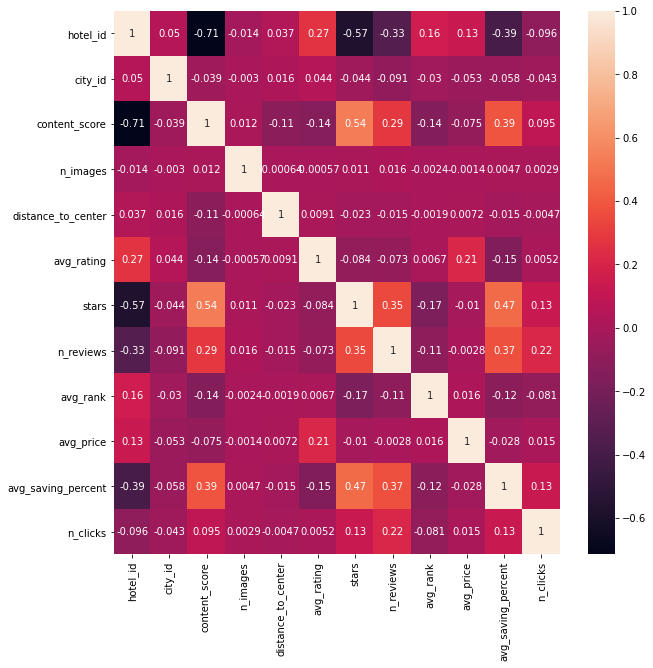

In [52]:
fig, ax = plt.pyplot.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True, ax=ax)

Average rating, n_images and distance to centre has very less corelation. So we can drop those.


In [47]:
df1.drop(['n_images','distance_to_center','avg_rating'],axis=1, inplace=True)

In [48]:
df1.head()

,hotel_id,city_id,content_score,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,9.767406e+10,134520.0,70.0,4.0,861.0,17.550,81.64,18.0,0
1,9.768889e+10,133876.0,67.0,4.0,4371.0,17.383,189.38,28.0,4
2,9.811544e+10,133732.0,39.0,3.0,1005.0,16.438,57.63,27.0,44
3,9.824279e+10,43772.0,59.0,2.0,3084.0,7.000,72.16,2.0,4
4,9.833438e+10,50532.0,66.0,0.0,603.0,12.564,173.25,0.0,10


In [49]:
df1.isnull().sum()

hotel_id                0
city_id               508
content_score         508
stars                 562
n_reviews             529
avg_rank                0
avg_price             170
avg_saving_percent    170
n_clicks                0
dtype: int64

In [50]:
from sklearn.impute import KNNImputer

In [57]:
imp = KNNImputer(n_neighbors=7)
df1 = pd.DataFrame(imp.fit_transform(df1),columns=df1.columns)

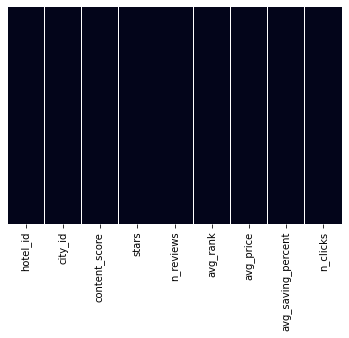

In [58]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f649cfe3e48>,
      dtype=object)

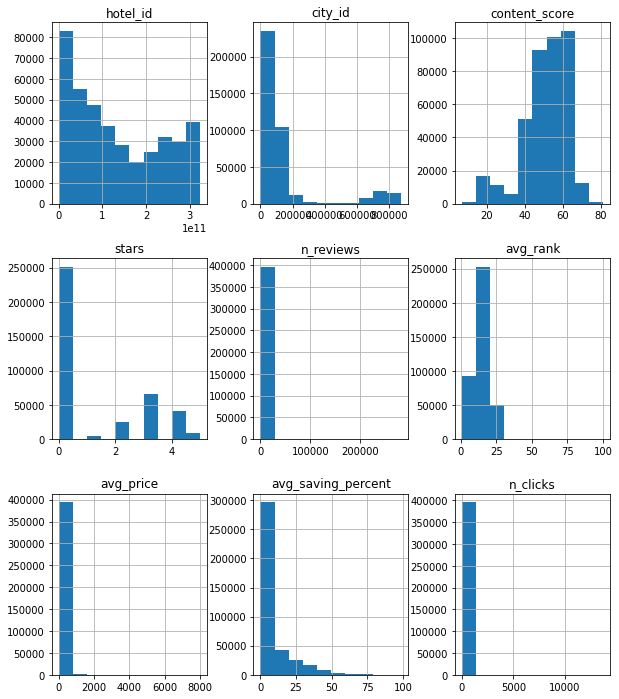

In [65]:
df1.hist(figsize=(10,12))

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
df1.columns

Index(['hotel_id', 'city_id', 'content_score', 'stars', 'n_reviews',
       'avg_rank', 'avg_price', 'avg_saving_percent', 'n_clicks'],
      dtype='object')

In [82]:
scale = StandardScaler()
scale_columns = ['hotel_id', 'city_id', 'content_score', 'stars', 'n_reviews', 'avg_rank', 'avg_price', 'avg_saving_percent']
df1[scale_columns] = scale.fit_transform(df1[scale_columns])

In [84]:
df1.head()

,hotel_id,city_id,content_score,stars,n_reviews,avg_rank,avg_price,avg_saving_percent,n_clicks
0,-0.338160,-0.066977,1.644295,1.754428,-0.021526,0.509494,-0.186897,0.827305,0.0
1,-0.338016,-0.069917,1.384787,1.754428,1.422253,0.479697,0.540187,1.591853,4.0
2,-0.333890,-0.070574,-1.037285,1.136785,0.037706,0.311085,-0.348929,1.515398,44.0
3,-0.332658,-0.481212,0.692766,0.519143,0.892867,-1.372898,-0.250873,-0.395972,4.0
4,-0.331772,-0.450355,1.298284,-0.716142,-0.127650,-0.380136,0.431333,-0.548882,10.0


In [85]:
source = df1.drop('n_clicks',axis=1)
target = df1['n_clicks']

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [87]:
X_train, X_test, y_train, y_test = train_test_split(source, target)

In [88]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

[12:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [89]:
y_pred = classifier.predict(X_test)

In [90]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

100.8446485392898


In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3245115928241469

In [92]:
regressor = xgboost.XGBRegressor()

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
parameters = {
              'base_score':[0.25,0.5,0.75,1],
              'booster':['gbtree','gblinear'],
              'learning_rate':[0.05,0.1,0.15,0.20],
              'min_child_weight':[1,2,3,4],
              'n_estimators':[100,200,500,700,900,1100,1500],
              'max_depth':[1,3,5,10,15]
}

In [95]:
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=parameters,
                               n_iter=100,
                               scoring='neg_mean_absolute_error',
                               cv=5,n_jobs=4,
                               verbose=5,
                               return_train_score = True,
                               random_state=42
                               )

In [ ]:
random_cv.fit(source,target)
random_cv.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 73.5min


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_x_train,df_x_test, df_y_train,df_y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state=7)
model = xgboost.XGBRegressor()
model.fit(df_x_train, df_y_train)
pred = model.predict(df_x_test)
prediction = [round(val) for val in pred]
accuracy = accuracy_score(df_y_test, prediction)
accuracy*100

[11:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


5.8406768520570775

In [ ]:
results.mean()

0.3076651673149411